In [1]:
#import data from sklearn.datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split
dataset = datasets.load_breast_cancer()
class_names = dataset.target_names
#split to training & testing
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size = 0.33, random_state=42)

In [2]:
print(class_names)

['malignant' 'benign']


In [4]:
print(dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


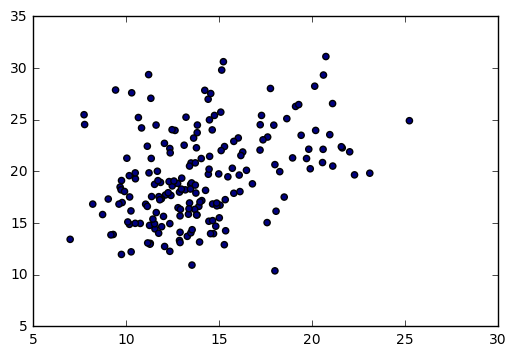

0.0
0


In [57]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
clustering = DBSCAN(eps=0.001, min_samples=2).fit(X_train)
# clustering.labels_
y_pred = DBSCAN().fit_predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred, normalize=False))


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred, normalize=False))

0.8670212765957447
163


# 從這裡開始才是要的！

In [13]:
from sklearn import cluster, datasets, metrics

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)
cluster_labels = kmeans_fit.labels_
print(iris_X.shape,cluster_labels.shape)
# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

(150, 4) (150,)
0.5528190123564091


In [1]:
#import data from sklearn.datasets
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
dataset = datasets.load_breast_cancer()
X = pd.DataFrame(dataset['data'])

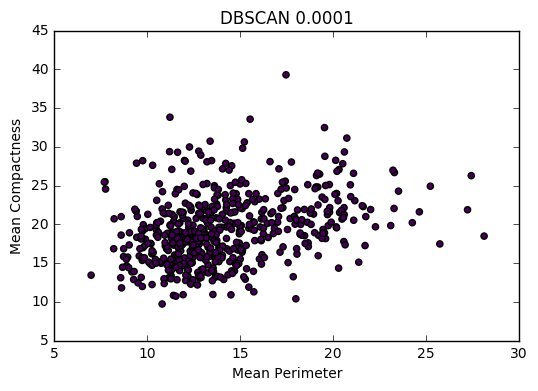

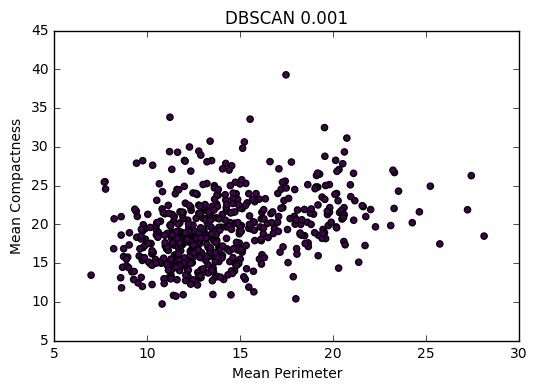

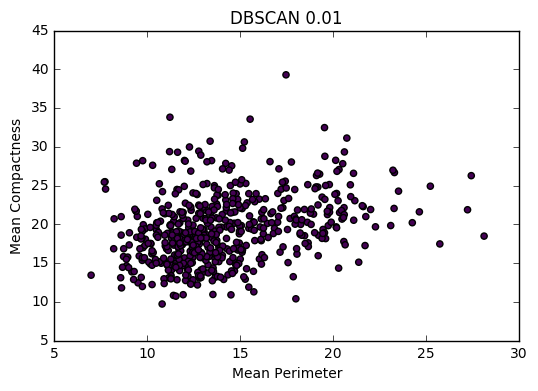

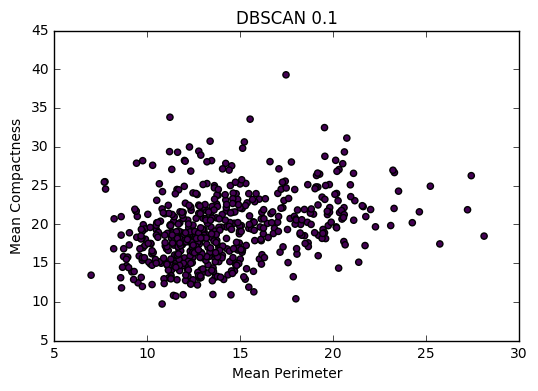

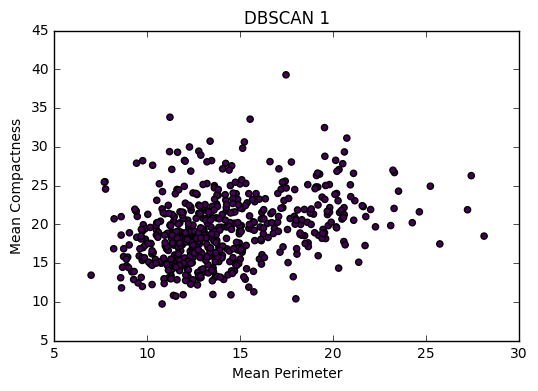

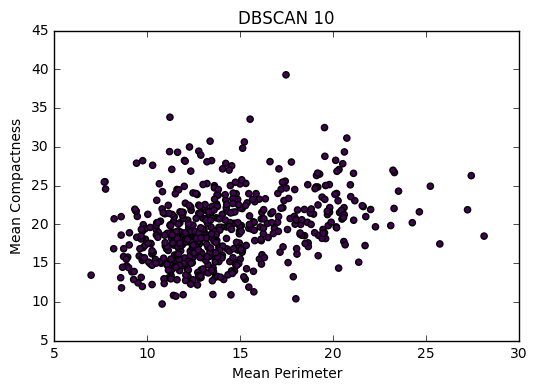

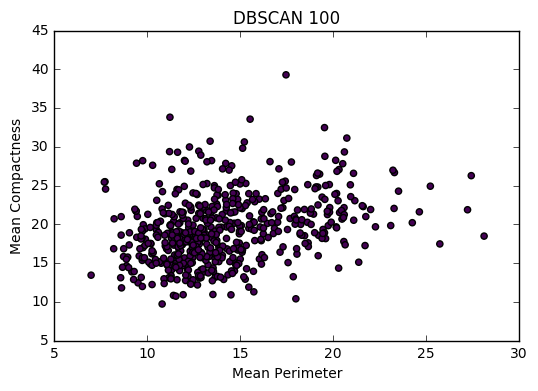

In [26]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
#以 Silhouette Coefficient 選擇兩點距離k
silhouette_avgs = []
ks = range(-4, 3)
for k in ks:
    clustering = DBSCAN(eps=pow(10, k), min_samples=10).fit(X)
    y_pred = DBSCAN().fit_predict(X)
    plt.scatter(X.values[:,0], X.values[:,1], c=y_pred, cmap='viridis')
    plt.ylabel('Mean Compactness')
    plt.xlabel('Mean Perimeter')
    plt.title('DBSCAN '+str(pow(10,k)))
    plt.show()
#     print(X.shape,y_pred.shape)
#     silhouette_avg = metrics.silhouette_score(X, y_pred)
#     silhouette_avgs.append(silhouette_avg)

#作圖並印出 K = 2~10 的 Silhouette Coefficient
# for k in ks:
#     print('K=', k, ', Silhouette =', silhouette_avgs[k-2])

# plt.bar(ks, silhouette_avgs)
# plt.ylabel('Silhouette Coefficient')
# plt.xlabel('Number of Clusters')
# plt.title('GMM')
# plt.show()

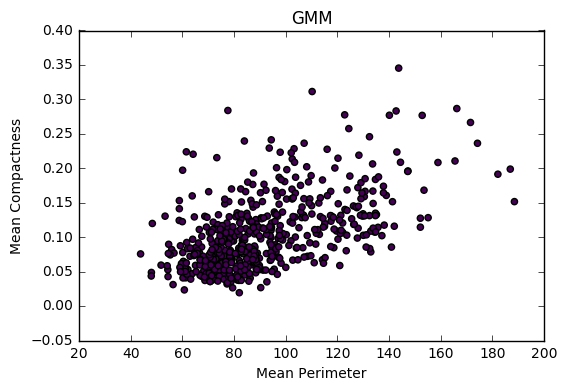

In [12]:
#選擇 k=2
clustering = DBSCAN(eps=2, min_samples=10).fit(X)
y_pred = DBSCAN().fit_predict(X)
#投影至其中兩個維度
plt.scatter(X.values[:,2], X.values[:,5], c=y_pred, cmap='viridis')
plt.ylabel('Mean Compactness')
plt.xlabel('Mean Perimeter')
plt.title('DBSCAN')
plt.show()

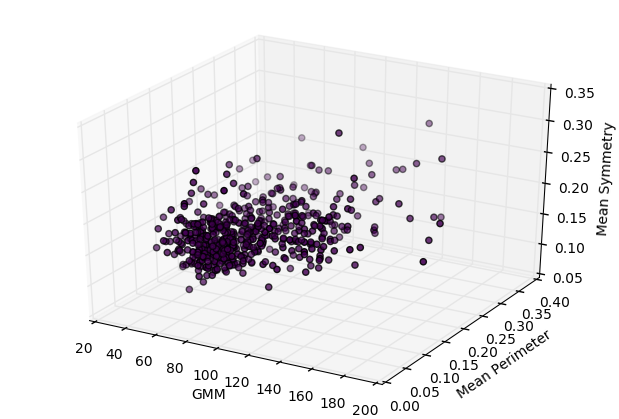

In [27]:
#投影至其中三個維度
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(X.values[:,2], X.values[:,5], X.values[:,8], c=y_pred, cmap='viridis')
ax.set_xlabel('Mean Compactness')
ax.set_ylabel('Mean Perimeter')
ax.set_zlabel('Mean Symmetry')
ax.set_xlabel('GMM')
pyplot.show()

In [ ]:
#description of each cluster
for i in range(0,2):
    print('### Clustering',i+1,'###\n',X[labels == i].describe(),'\n')